In [1]:
# Import libraries and insert CSV file to code
import types
import pandas as pd
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf63d8034a7a4cfe81617b85e5075c04 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UKICnXUxtZsMBUBsVLom3-0jpUeC1olPkk26AkdM9W68',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf63d8034a7a4cfe81617b85e5075c04.get_object(Bucket='matplotlibtovisualizesurveyresult-donotdelete-pr-qsgynzgi87xpox',Key='Topic_Survey_Assignment.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_survey = pd.read_csv(body, index_col=0) # Set first column as index
df_survey


,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [2]:
# Sort survey results in descending order of 'Very Interested'
df_survey_sorted = df_survey.sort_values(['Very interested'], ascending=False, axis=0)
df_survey_sorted

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


[]

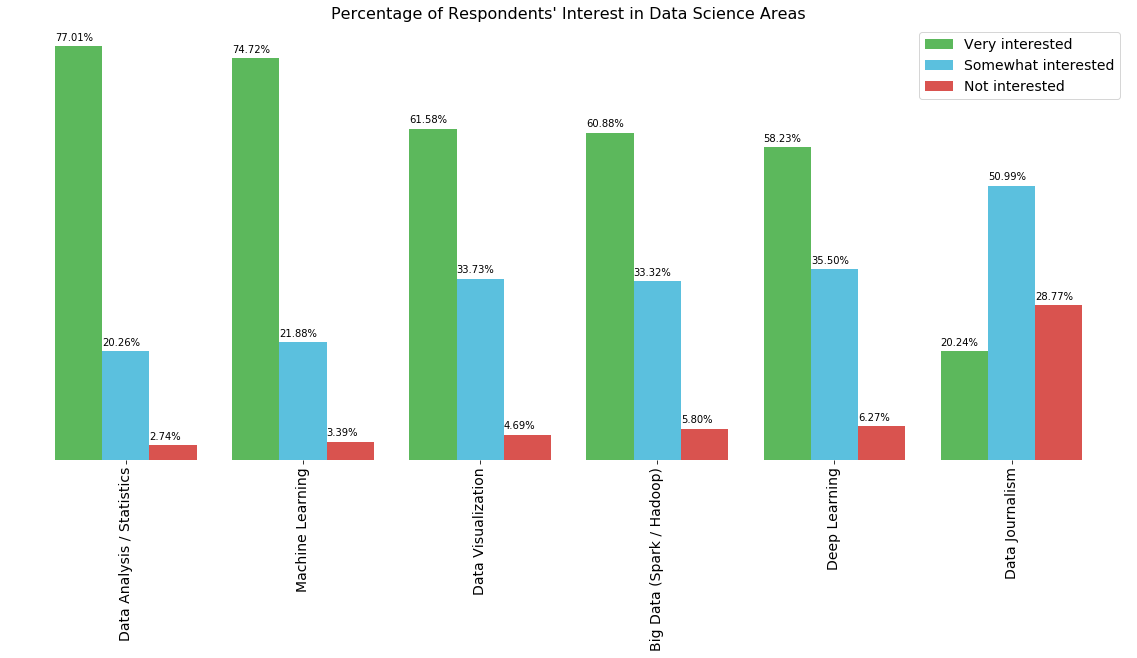

In [3]:
# Plot response and display % of interest in the various areas
ax1 = df_survey_sorted.div(df_survey_sorted.sum(1), axis=0).plot(kind='bar', figsize=(20,8), width=0.8, 
                                                color=['#5cb85c', '#5bc0de', '#d9534f'], edgecolor=None)

ax1.set_title('Percentage of Respondents\' Interest in Data Science Areas', loc='center', fontsize=16)
ax1.legend(labels=df_survey_sorted.columns, fontsize=14)

#loop each bar to determine 2 decimal place percentage
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

#remove border and format x and y tick labels
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)

ax1.set_yticks([])